In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Performance Evaluation of Regression Model

## Lets try on a sample data first

In [2]:
from sklearn.model_selection import train_test_split

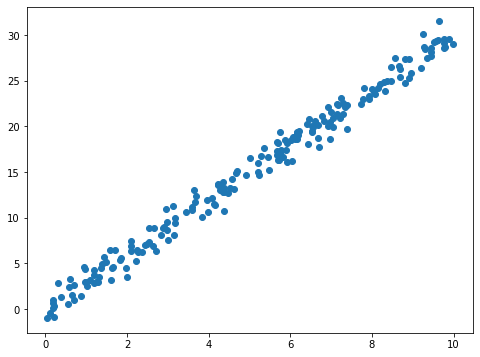

In [3]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(200)
y = 3 * x + np.random.randn(200)
plt.figure(figsize = (8, 6))
plt.scatter(x, y);
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [6]:
y_train_pred = model.predict(X_train.reshape(-1, 1))

y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1: Residual Analysis

<img src='18-9-residual-analysis-l.jpg'/></a>

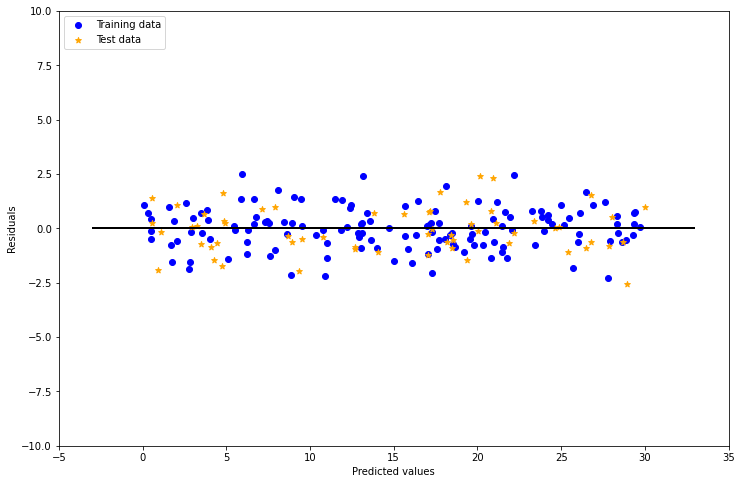

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-10, 10])
plt.show()

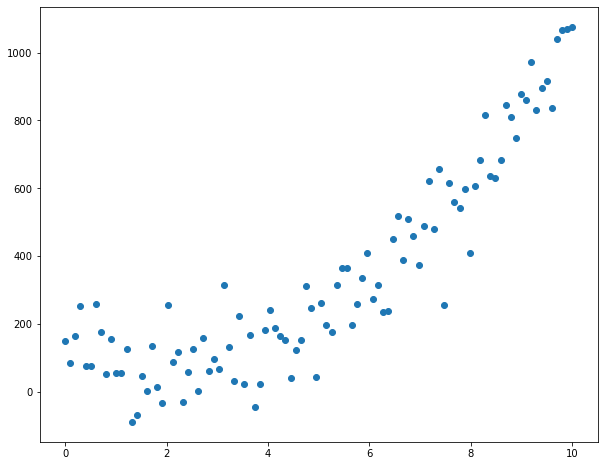

In [8]:
np.random.seed(42)
n_samples = 100

X_new = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y_new = X_new ** 3 + rng + 100

plt.figure(figsize=(10,8));
plt.scatter(X_new, y_new);

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

In [10]:
model2 = LinearRegression()

model2.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [11]:
y_train_pred = model.predict(X_train.reshape(-1, 1))

y_test_pred = model.predict(X_test.reshape(-1, 1))

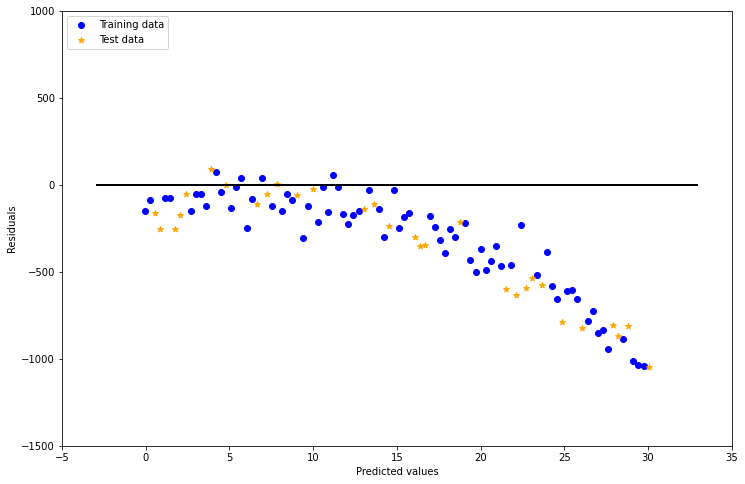

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-1500, 1000])
plt.show()

### If there is polinomial relationship in residuals, You can dircetly go for polynomial regreassion

### if residuals are away from center line and no polynomial relationship in residuals, then you can use RANSAC to deal with outliers

# Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_train_pred)

181746.1508132463

In [14]:
mean_squared_error(y_test, y_test_pred)

228940.19860333938

# Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [15]:
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

-1.0604509866467078

In [16]:
r2_score(y_test, y_test_pred)

-1.196314456600288

# Let's try this out with a Real world example
We are gonna use the boston housing data

In [17]:
boston = pd.read_csv('boston_house.csv', header = None)

In [18]:
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
boston.shape

(506, 14)

### This is how data actually represents
| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [20]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [21]:
boston.columns = col_name

In [22]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Data Cleaning

In [23]:
boston.shape

(506, 14)

In [24]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [26]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Let's experiment on boston data

In [27]:
X = boston['LSTAT'].values.reshape(-1,1)
y = boston['MEDV'].values

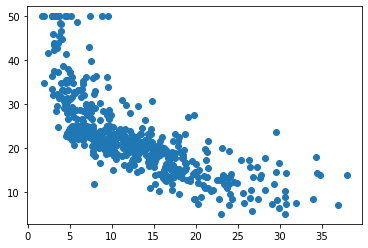

In [28]:
plt.scatter(X,y)

In [29]:
X.shape

(506, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
lr.coef_

array([-0.96274269])

In [34]:
y_train_pred = lr.predict(X_train)

In [35]:
y_test_pred = lr.predict(X_test)

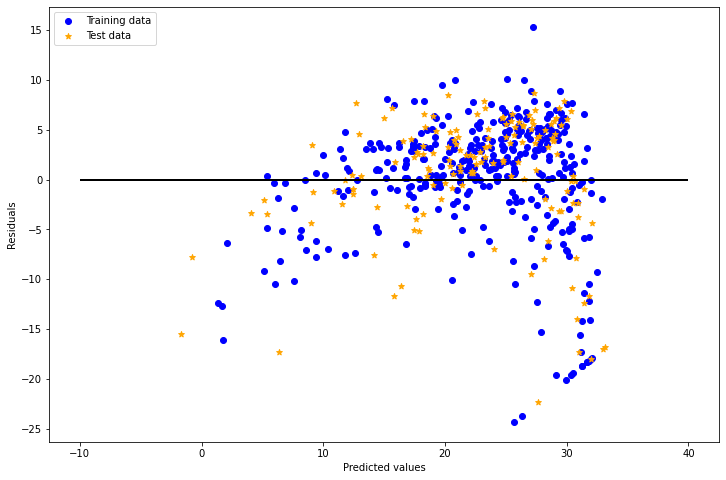

In [36]:
# Residual analysis

plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=40, lw=2, color='k')
#plt.xlim([-10, 40])
#plt.ylim([-30, 20])
plt.show()

In [37]:
# Mean squeare error

mean_squared_error(y_train, y_train_pred)

38.83400364829883

In [38]:
mean_squared_error(y_test, y_test_pred)

37.74194910832392

In [39]:
# coefficient of determination (r2)

r2_score(y_train, y_train_pred)

0.5431705891047645

In [40]:
r2_score(y_test, y_test_pred)

0.5430865728162095

# Robust Regression

# RANdom SAmple Consensus (RANSAC) Algorithm

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [41]:
X = boston['LSTAT'].values.reshape(-1,1)
y = boston['MEDV'].values

In [42]:
from sklearn.linear_model import RANSACRegressor

In [43]:
robust = RANSACRegressor()

In [44]:
robust.fit(X,y)

RANSACRegressor()

In [45]:
inlier_mask = robust.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

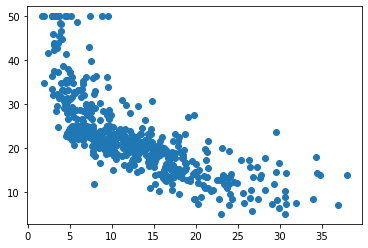

In [46]:
plt.scatter(X,y)

In [47]:
line_X = np.arange(0, 40, 1)
line_y_robust = robust.predict(line_X.reshape(-1, 1))

In [48]:
import seaborn as sns

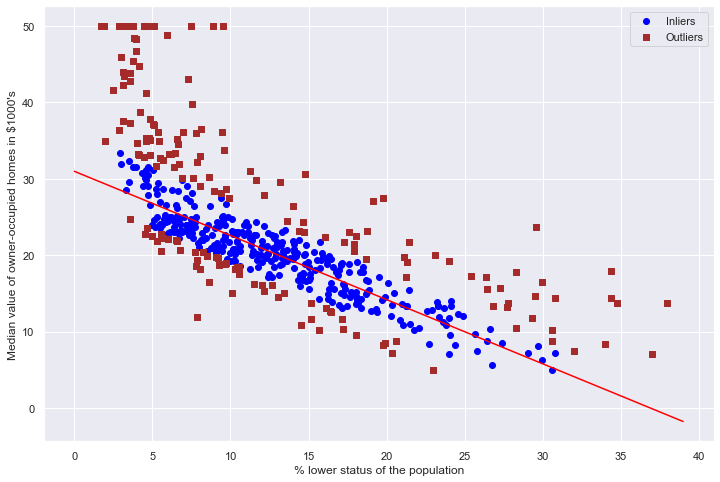

In [49]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_robust, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

In [50]:
robust.estimator_.coef_

array([-0.84009921])

In [51]:
robust.estimator_.intercept_

30.98665506902823

In [52]:
X = boston['RM'].values.reshape(-1,1)
y = boston['MEDV'].values
robust.fit(X, y)
inlier_mask = robust.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

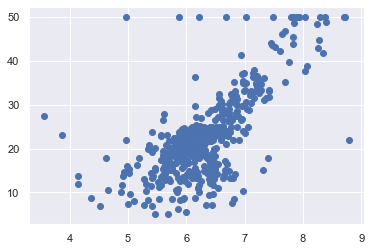

In [53]:
plt.scatter(X,y)

In [54]:
line_X = np.arange(3, 10, 1)
line_y_robust = robust.predict(line_X.reshape(-1, 1))

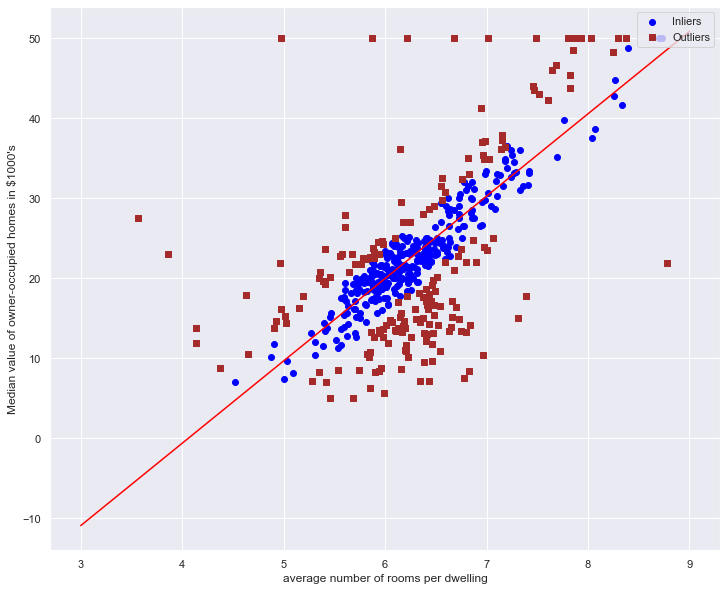

In [55]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_robust, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

In [56]:
robust.estimator_.coef_

array([10.29950308])

In [57]:
robust.estimator_.intercept_

-41.82151018688333